In [56]:
import zipfile
import os

# Ruta del archivo ZIP subido
zip_path = '/content/Brain Tumor Data Set.zip'

# Directorio donde deseas extraer los archivos
extract_path = '/content/brain_tumor_dataset/'

# Crear el directorio si no existe
os.makedirs(extract_path, exist_ok=True)

# Extraer el archivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"El archivo ha sido extraído a {extract_path}")

El archivo ha sido extraído a /content/brain_tumor_dataset/


In [ ]:
!pip install split-folders
!pip install torch-summary

In [59]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')
import copy # A module that provides functions for creating copies of objects, useful for avoiding unintended modifications to variables.
import os # A module that provides a way to interact with the operating system, allowing for tasks such as file and directory manipulation.
import torch
from PIL import Image # A module from the Python Imaging Library (PIL) that provides functionality for opening, manipulating, and saving various image file formats.
from torch.utils.data import Dataset # A PyTorch class that represents a dataset and provides an interface for accessing and processing the data during training.
import torchvision
import torchvision.transforms as transforms # A module from the torchvision library that provides common image transformations, such as resizing, cropping, and normalization.
from torch.utils.data import random_split # A function from PyTorch that allows for randomly splitting a dataset into training and validation subsets.
from torch.optim.lr_scheduler import ReduceLROnPlateau # A PyTorch scheduler that adjusts the learning rate during training based on a specified metric, reducing it when the metric plateaus.
import torch.nn as nn # A module in PyTorch that provides classes for defining and building neural networks.
from torchvision import utils # A module from torchvision that contains utility functions for working with images, such as saving and visualizing them.
from torchvision.datasets import ImageFolder
import splitfolders
from torchsummary import summary
import torch.nn.functional as F
import pathlib
from sklearn.metrics import confusion_matrix, classification_report
import itertools # This import statement imports the itertools module, which provides functions for efficient looping and combining of iterables. It can be used for tasks such as generating combinations or permutations of elements.
from tqdm.notebook import trange, tqdm # These functions allow for the creation of progress bars to track the progress of loops or tasks.
from torch import optim
import warnings
warnings.filterwarnings('ignore')

In [ ]:
labels_df = pd.read_csv('/content/brain_tumor_dataset/Brain Tumor Data Set/metadata.csv')
print(labels_df.head().to_markdown())

|    |   Unnamed: 0 | image           | class   | format   | mode   | shape         |
|---:|-------------:|:----------------|:--------|:---------|:-------|:--------------|
|  0 |            0 | Cancer (1).jpg  | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  1 |            1 | Cancer (1).png  | tumor   | PNG      | L      | (300, 240)    |
|  2 |            2 | Cancer (1).tif  | tumor   | TIFF     | RGB    | (256, 256, 3) |
|  3 |            3 | Cancer (10).jpg | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  4 |            4 | Cancer (10).tif | tumor   | TIFF     | RGB    | (256, 256, 3) |


In [ ]:
os.listdir('/content/brain_tumor_dataset/Brain Tumor Data Set')

['Healthy', 'metadata_rgb_only.csv', 'metadata.csv', 'Brain Tumor']

In [ ]:
train_dir = data_dir.joinpath('train')
val_dir = data_dir.joinpath('val')

print(train_dir.exists())  # Debería ser True
print(val_dir.exists())    # Debería ser True


False
False


In [ ]:
# Reintenta el split y verifica que las carpetas se creen correctamente
import splitfolders

data_dir = pathlib.Path('/content/brain_tumor_dataset/Brain Tumor Data Set')

# Realiza el split con un nombre de salida especificado
splitfolders.ratio(data_dir, output='/kaggle/working/brain', seed=20, ratio=(0.8, 0.2))

# Verifica las carpetas
os.listdir('/kaggle/working/brain')



Copying files: 4600 files [00:01, 4216.93 files/s]


['train', 'val']

In [69]:
import os
import shutil
import random

# Rutas
source_dir = '/kaggle/working/brain'  # Ruta de las imágenes desordenadas
train_dir = '/content/brain/train'    # Ruta de entrenamiento
val_dir = '/content/brain/val'        # Ruta de validación

# Crear las carpetas de train y val si no existen
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Crear subcarpetas para cada clase en train y val
classes = ['glioma', 'meningioma', 'notumor']  # Reemplaza con las clases de tu dataset

for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

# Mover las imágenes
for class_name in classes:
    # Verifica si el directorio de clase existe en el directorio fuente
    class_dir = os.path.join(source_dir, class_name)

    if not os.path.exists(class_dir):
        print(f"Advertencia: No se encontró el directorio para la clase '{class_name}' en '{source_dir}'")
        continue  # Si no existe, continúa con la siguiente clase

    # Obtener todas las imágenes de la clase
    images = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]  # O el tipo de imagen adecuado

    # Mezclar imágenes para dividir entre train y val
    random.shuffle(images)

    # Calcular el número de imágenes para el conjunto de validación (20%)
    val_size = int(len(images) * 0.2)

    # Mover las imágenes al directorio de entrenamiento y validación
    for i, image in enumerate(images):
        src_path = os.path.join(class_dir, image)

        # Dividir las imágenes entre train y val
        if i < val_size:
            dst_path = os.path.join(val_dir, class_name, image)
        else:
            dst_path = os.path.join(train_dir, class_name, image)

        shutil.move(src_path, dst_path)

# Verifica la estructura final
print("Estructura de directorios de entrenamiento:")
os.listdir(train_dir)

print("Estructura de directorios de validación:")
os.listdir(val_dir)




Advertencia: No se encontró el directorio para la clase 'glioma' en '/kaggle/working/brain'
Advertencia: No se encontró el directorio para la clase 'meningioma' en '/kaggle/working/brain'
Advertencia: No se encontró el directorio para la clase 'notumor' en '/kaggle/working/brain'
Estructura de directorios de entrenamiento:
Estructura de directorios de validación:


['Healthy', 'meningioma', 'notumor', 'Brain Tumor', 'glioma']

In [70]:
import shutil
import os

# Rutas de las carpetas
source_dir = '/content/brain'  # Carpeta de origen
destination_dir = '/content/brain_tumor_dataset'  # Carpeta de destino

# Verificar que la carpeta de destino existe, si no, crearla
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Mover todo el contenido de la carpeta origen a la carpeta destino
for item in os.listdir(source_dir):
    source_item = os.path.join(source_dir, item)
    destination_item = os.path.join(destination_dir, item)

    # Mover cada archivo o subcarpeta
    if os.path.isdir(source_item):
        shutil.move(source_item, destination_item)  # Mover subcarpetas
    else:
        shutil.move(source_item, destination_item)  # Mover archivos

print(f"El contenido de {source_dir} se ha movido a {destination_dir}")


El contenido de /content/brain se ha movido a /content/brain_tumor_dataset


In [71]:
labels_df = pd.read_csv('/content/brain_tumor_dataset/Brain Tumor Data Set/metadata.csv')
print(labels_df.head().to_markdown())

|    |   Unnamed: 0 | image           | class   | format   | mode   | shape         |
|---:|-------------:|:----------------|:--------|:---------|:-------|:--------------|
|  0 |            0 | Cancer (1).jpg  | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  1 |            1 | Cancer (1).png  | tumor   | PNG      | L      | (300, 240)    |
|  2 |            2 | Cancer (1).tif  | tumor   | TIFF     | RGB    | (256, 256, 3) |
|  3 |            3 | Cancer (10).jpg | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  4 |            4 | Cancer (10).tif | tumor   | TIFF     | RGB    | (256, 256, 3) |


In [72]:
labels_df.shape

(4600, 6)

In [74]:
# Dataset Path
data_dir = '/content/brain_tumor_dataset/Brain Tumor Data Set'
data_dir = pathlib.Path(data_dir)

# Splitting dataset to train_set, val_set and test_set
splitfolders.ratio(data_dir, output='brain', seed=20, ratio=(0.8, 0.2))


# New dataset path
data_dir = '/kaggle/working/brain'
data_dir = pathlib.Path(data_dir)

Copying files: 4600 files [00:01, 3790.80 files/s]


In [75]:
# define transformation
transform = transforms.Compose(
    [
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.485, 0.456, 0.406],std = [0.229, 0.224, 0.225])
   ]
)

In [76]:
# Define an object of the custom dataset for the train and validation.
train_set = torchvision.datasets.ImageFolder(data_dir.joinpath("train"), transform=transform)
train_set.transform
val_set = torchvision.datasets.ImageFolder(data_dir.joinpath("val"), transform=transform)
val_set.transform

Compose(
    Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

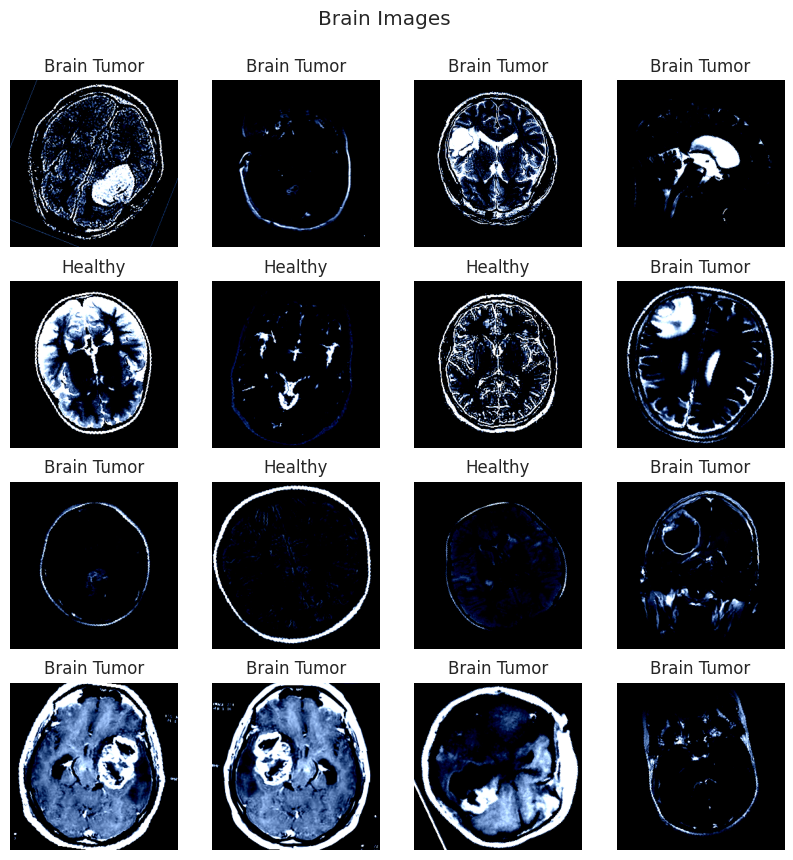

In [77]:
# Visualiztion some images from Train Set
CLA_label = {
    0 : 'Brain Tumor',
    1 : 'Healthy'
}
figure = plt.figure(figsize=(10, 10))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(CLA_label[label])
    plt.axis("off")
    img_np = img.numpy().transpose((1, 2, 0))
    # Clip pixel values to [0, 1]
    img_valid_range = np.clip(img_np, 0, 1)
    plt.imshow(img_valid_range)
    plt.suptitle('Brain Images', y=0.95)
plt.show()

In [78]:
# import and load train, validation
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True, num_workers = 2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size = batch_size, shuffle = True, num_workers = 2)

In [79]:
# print shape for Training data and Validation data
for key, value in {'Training data': train_loader, "Validation data": val_loader}.items():
    for X, y in value:
        print(f"{key}:")
        print(f"Shape of X : {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}\n")
        break

Training data:
Shape of X : torch.Size([64, 3, 256, 256])
Shape of y: torch.Size([64]) torch.int64

Validation data:
Shape of X : torch.Size([64, 3, 256, 256])
Shape of y: torch.Size([64]) torch.int64



In [80]:
'''This function can be useful in determining the output size of a convolutional layer in a neural network,
given the input dimensions and the convolutional layer's parameters.'''

def findConv2dOutShape(hin,win,conv,pool=2):
    # get conv arguments
    kernel_size = conv.kernel_size
    stride=conv.stride
    padding=conv.padding
    dilation=conv.dilation

    hout=np.floor((hin+2*padding[0]-dilation[0]*(kernel_size[0]-1)-1)/stride[0]+1)
    wout=np.floor((win+2*padding[1]-dilation[1]*(kernel_size[1]-1)-1)/stride[1]+1)

    if pool:
        hout/=pool
        wout/=pool
    return int(hout),int(wout)

In [81]:
# Define Architecture For CNN_TUMOR Model
class CNN_TUMOR(nn.Module):

    # Network Initialisation
    def __init__(self, params):

        super(CNN_TUMOR, self).__init__()

        Cin,Hin,Win = params["shape_in"]
        init_f = params["initial_filters"]
        num_fc1 = params["num_fc1"]
        num_classes = params["num_classes"]
        self.dropout_rate = params["dropout_rate"]

        # Convolution Layers
        self.conv1 = nn.Conv2d(Cin, init_f, kernel_size=3)
        h,w=findConv2dOutShape(Hin,Win,self.conv1)
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv2)
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv3)
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv4)

        # compute the flatten size
        self.num_flatten=h*w*8*init_f
        self.fc1 = nn.Linear(self.num_flatten, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_classes)

    def forward(self,X):

        # Convolution & Pool Layers
        X = F.relu(self.conv1(X));
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv4(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, self.num_flatten)
        X = F.relu(self.fc1(X))
        X = F.dropout(X, self.dropout_rate)
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)

In [82]:
params_model={
        "shape_in": (3,256,256),
        "initial_filters": 8,
        "num_fc1": 100,
        "dropout_rate": 0.25,
        "num_classes": 2}

# Create instantiation of Network class
cnn_model = CNN_TUMOR(params_model)

# define computation hardware approach (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = cnn_model.to(device)

In [83]:
# Model Summary for CNN Model
summary(cnn_model, input_size=(3, 256, 256),device=device.type)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            224
├─Conv2d: 1-2                            1,168
├─Conv2d: 1-3                            4,640
├─Conv2d: 1-4                            18,496
├─Linear: 1-5                            1,254,500
├─Linear: 1-6                            202
Total params: 1,279,230
Trainable params: 1,279,230
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            224
├─Conv2d: 1-2                            1,168
├─Conv2d: 1-3                            4,640
├─Conv2d: 1-4                            18,496
├─Linear: 1-5                            1,254,500
├─Linear: 1-6                            202
Total params: 1,279,230
Trainable params: 1,279,230
Non-trainable params: 0

In [84]:
loss_func = nn.NLLLoss(reduction="sum")

In [85]:
opt = optim.Adam(cnn_model.parameters(), lr=3e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

In [86]:
def Train_Val(model, params,verbose=False):

    # Get the parameters
    epochs=params["epochs"]
    loss_func=params["f_loss"]
    opt=params["optimiser"]
    train_dl=params["train"]
    val_dl=params["val"]
    lr_scheduler=params["lr_change"]
    weight_path=params["weight_path"]

    # history of loss values in each epoch
    loss_history={"train": [],"val": []}
    # histroy of metric values in each epoch
    metric_history={"train": [],"val": []}
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())
    # initialize best loss to a large value
    best_loss=float('inf')

# Train Model n_epochs (the progress of training by printing the epoch number and the associated learning rate. It can be helpful for debugging, monitoring the learning rate schedule, or gaining insights into the training process.)

    for epoch in tqdm(range(epochs)):

        # Get the Learning Rate
        current_lr=get_lr(opt)
        if(verbose):
            print('Epoch {}/{}, current lr={}'.format(epoch, epochs - 1, current_lr))


# Train Model Process


        model.train()
        train_loss, train_metric = loss_epoch(model,loss_func,train_dl,opt)

        # collect losses
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)


# Evaluate Model Process


        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model,loss_func,val_dl)

        # store best model
        if(val_loss < best_loss):
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())

            # store weights into a local file
            torch.save(model.state_dict(), weight_path)
            if(verbose):
                print("Copied best model weights!")

        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)

        # learning rate schedule
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            if(verbose):
                print("Loading best model weights!")
            model.load_state_dict(best_model_wts)

        if(verbose):
            print(f"train loss: {train_loss:.6f}, dev loss: {val_loss:.6f}, accuracy: {100*val_metric:.2f}")
            print("-"*10)

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, loss_history, metric_history

In [55]:
# Define various parameters used for training and evaluation of a cnn_model

params_train={
 "train": train_loader,"val": val_loader,
 "epochs": 60,
 "optimiser": optim.Adam(cnn_model.parameters(),lr=3e-4),
 "lr_change": ReduceLROnPlateau(opt,
                                mode='min',
                                factor=0.5,
                                patience=20,
                                verbose=0),
 "f_loss": nn.NLLLoss(reduction="sum"),
 "weight_path": "weights.pt",
}

# train and validate the model
cnn_model,loss_hist,metric_hist = Train_Val(cnn_model,params_train)

Epoch 1/60, Training Loss: 38.4905, Validation Loss: 34.0959, LR: 0.0003
Epoch 2/60, Training Loss: 32.4871, Validation Loss: 31.0534, LR: 0.0003
Epoch 3/60, Training Loss: 28.2372, Validation Loss: 27.1726, LR: 0.0003
Epoch 4/60, Training Loss: 25.1253, Validation Loss: 25.7246, LR: 0.0003
Epoch 5/60, Training Loss: 22.9970, Validation Loss: 22.7034, LR: 0.0003
Epoch 6/60, Training Loss: 20.9658, Validation Loss: 20.6993, LR: 0.0003
Epoch 7/60, Training Loss: 19.4989, Validation Loss: 21.4791, LR: 0.0003
Epoch 8/60, Training Loss: 18.5824, Validation Loss: 16.3800, LR: 0.0003
Epoch 9/60, Training Loss: 16.7765, Validation Loss: 17.4293, LR: 0.0003
Epoch 10/60, Training Loss: 16.7222, Validation Loss: 16.5924, LR: 0.0003
Epoch 11/60, Training Loss: 15.8889, Validation Loss: 15.4979, LR: 0.0003
Epoch 12/60, Training Loss: 13.9427, Validation Loss: 14.1848, LR: 0.0003
Epoch 13/60, Training Loss: 14.5679, Validation Loss: 13.7868, LR: 0.0003
Epoch 14/60, Training Loss: 12.9097, Validation

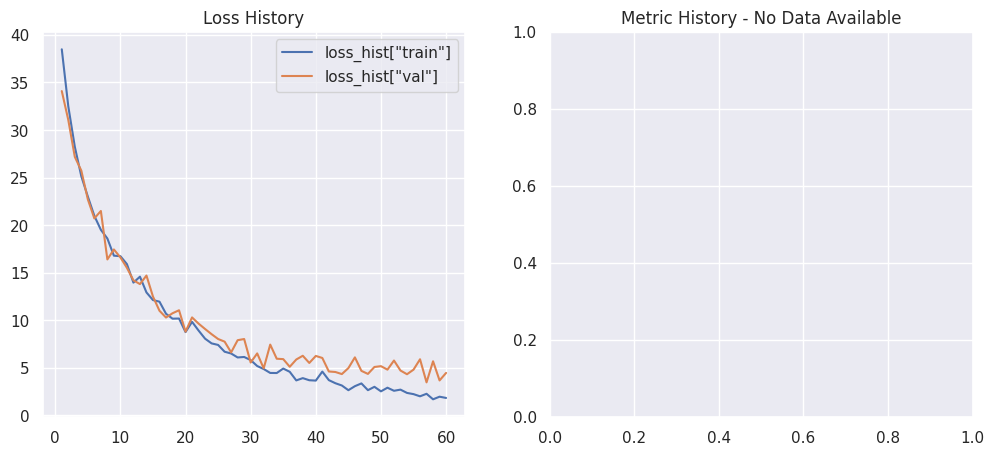

In [88]:
# Convergence History Plot
epochs = params_train["epochs"]
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Graficar loss_hist
sns.lineplot(x=[*range(1, epochs + 1)], y=loss_hist["train"], ax=ax[0], label='loss_hist["train"]')
sns.lineplot(x=[*range(1, epochs + 1)], y=loss_hist["val"], ax=ax[0], label='loss_hist["val"]')
ax[0].set_title("Loss History")

# Graficar metric_hist si tiene datos
if metric_hist["train"] and metric_hist["val"]:
    sns.lineplot(x=[*range(1, epochs + 1)], y=metric_hist["train"], ax=ax[1], label='Acc_hist["train"]')
    sns.lineplot(x=[*range(1, epochs + 1)], y=metric_hist["val"], ax=ax[1], label='Acc_hist["val"]')
    ax[1].set_title("Metric History")
else:
    ax[1].set_title("Metric History - No Data Available")
plt.show()


In [66]:
# define function For Classification Report
def Ture_and_Pred(val_loader, model):
    i = 0
    y_true = []
    y_pred = []
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.numpy()
        outputs = model(images)
        _, pred = torch.max(outputs.data, 1)
        pred = pred.detach().cpu().numpy()

        y_true = np.append(y_true, labels)
        y_pred = np.append(y_pred, pred)

    return y_true, y_pred


# check confusion matrix for error analysis
y_true, y_pred = Ture_and_Pred(val_loader, cnn_model)

print(classification_report(y_true, y_pred), '\n\n')
cm = confusion_matrix(y_true, y_pred)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       503
         1.0       0.98      0.98      0.98       418

    accuracy                           0.98       921
   macro avg       0.98      0.98      0.98       921
weighted avg       0.98      0.98      0.98       921
 




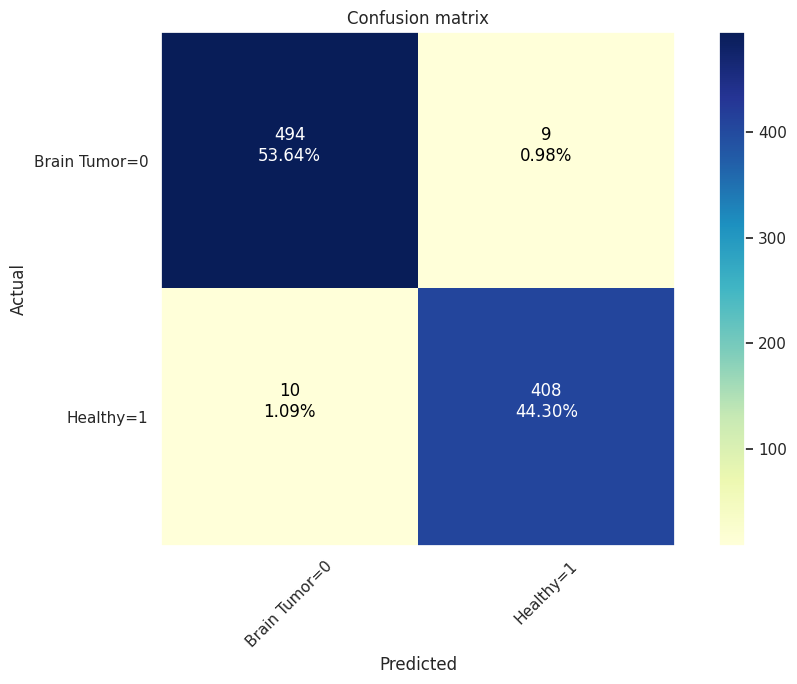

In [67]:
# Confusion Matrix Plotting Function
def show_confusion_matrix(cm, CLA_label, title='Confusion matrix', cmap=plt.cm.YlGnBu):

    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(CLA_label))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in CLA_label.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in CLA_label.items()])

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%", horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

show_confusion_matrix(cm, CLA_label)

In [68]:
torch.save(cnn_model, "Brain_Tumor_model.pt")